In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('/content/d_output.csv')

In [3]:
data.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.170845,30.945626,25.921971,6.252659,Yes
1,2,F,43.163481,30.306974,26.759843,8.578865,Yes
2,3,F,46.269997,27.315656,26.028556,9.640936,Yes
3,4,F,45.054787,30.469816,24.460797,4.794217,Yes
4,5,M,45.061884,31.218572,24.071714,8.865329,Yes


In [4]:
data.isnull().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [5]:
data['Sex'] = data['Sex'].str.strip().replace({'M': 0, 'F': 1})
data['Anaemic'] = data['Anaemic'].replace({'No': 0, 'Yes': 1})

In [6]:
data.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,0,43.170845,30.945626,25.921971,6.252659,1
1,2,1,43.163481,30.306974,26.759843,8.578865,1
2,3,1,46.269997,27.315656,26.028556,9.640936,1
3,4,1,45.054787,30.469816,24.460797,4.794217,1
4,5,0,45.061884,31.218572,24.071714,8.865329,1


In [7]:
data.drop(columns=['Number'],inplace=True)

In [8]:
data.describe()

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.542000,45.030260,29.392138,25.576149,10.938374,0.500000
std,0.498732,2.777042,1.585042,1.917043,2.767554,0.500501
min,0.000000,38.626133,25.023080,19.495306,4.000000,0.000000
25%,0.000000,43.199936,28.311988,24.877544,9.061067,0.000000
50%,1.000000,44.906648,29.534431,25.982361,10.018786,0.500000
75%,1.000000,46.357891,30.582852,26.754657,13.092756,1.000000
max,1.000000,54.776064,32.526455,29.956341,16.508313,1.000000


<Axes: xlabel='Anaemic', ylabel='count'>

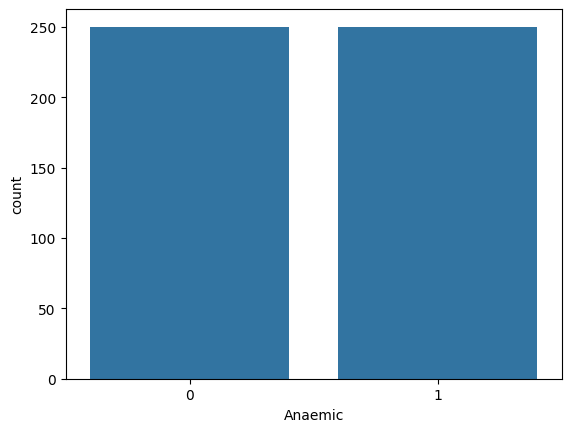

In [9]:
sns.countplot(x='Anaemic',data=data)

In [10]:
data['Anaemic'].value_counts()

Anaemic
1    250
0    250
Name: count, dtype: int64

In [11]:
X = data.drop(columns=['Anaemic'])
Y = data['Anaemic']

In [12]:
model = LogisticRegression()
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [13]:
X_train

,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb
428,0,48.457898,26.570054,24.616488,15.109896
490,1,44.890023,29.126156,25.928096,12.939286
53,1,46.580966,28.231847,25.485691,13.477410
336,1,44.470019,29.105382,26.644883,15.507529
154,1,49.859065,29.271775,20.744147,9.900000
...,...,...,...,...,...
22,0,43.066013,30.371375,26.543117,9.581785
72,0,46.226552,28.313935,25.258510,13.115021
493,0,46.925620,25.979260,26.976566,14.701059
15,1,46.954649,28.521302,24.596548,8.529450


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(x_test)

model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        51

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix:
[[49  0]
 [ 0 51]]
